In [1]:
#import pakeage
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.style.use('ggplot')
import seaborn as sns

In [2]:
data = pd.read_csv('character-deaths.csv')

In [3]:
#check info
print(data.shape)
data.info()

(917, 13)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 917 entries, 0 to 916
Data columns (total 13 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                917 non-null    object 
 1   Allegiances         917 non-null    object 
 2   Death Year          305 non-null    float64
 3   Book of Death       307 non-null    float64
 4   Death Chapter       299 non-null    float64
 5   Book Intro Chapter  905 non-null    float64
 6   Gender              917 non-null    int64  
 7   Nobility            917 non-null    int64  
 8   GoT                 917 non-null    int64  
 9   CoK                 917 non-null    int64  
 10  SoS                 917 non-null    int64  
 11  FfC                 917 non-null    int64  
 12  DwD                 917 non-null    int64  
dtypes: float64(4), int64(7), object(2)
memory usage: 86.0+ KB


In [4]:
#check all columns
print(data.columns.values)
data.head(5)

['Name' 'Allegiances' 'Death Year' 'Book of Death' 'Death Chapter'
 'Book Intro Chapter' 'Gender' 'Nobility' 'GoT' 'CoK' 'SoS' 'FfC' 'DwD']


,Name,Allegiances,Death Year,Book of Death,Death Chapter,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,NaN,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,3.0,51.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,NaN,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,5.0,20.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,NaN,NaN,1,1,0,0,1,0,0


* Allegiances: 所屬國家
* Death Year: 死亡年 (選擇)
* Book of Death: 在第幾集死亡
* Death Chapter: 在第幾章死亡
* Book Intro Chapter: 書籍介紹章節
* Gender: 1為男 0為女
* Nobility: 1是貴族 0不是貴族
* GoT: 1有出現在書本第一集 0沒有出現在書本第一集
* CoK: 1有出現在書本第二集 0沒有出現在書本第二集
* SoS: 1有出現在書本第三集 0沒有出現在書本第三集
* FfC: 1有出現在書本第四集 0沒有出現在書本第四集
* DwD: 1有出現在書本第五集 0沒有出現在書本第五集

In [5]:
#drop Book of Death & Death Chapter
data.drop('Book of Death' , 1, inplace=True)
data.drop('Death Chapter', 1, inplace=True)

In [6]:
#check all columns again
print(data.columns.values)
data.head(5)

['Name' 'Allegiances' 'Death Year' 'Book Intro Chapter' 'Gender'
 'Nobility' 'GoT' 'CoK' 'SoS' 'FfC' 'DwD']


,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,NaN,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,NaN,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,NaN,NaN,1,1,0,0,1,0,0


In [7]:
# have some null in data
print('Train columns with null values:\n', data.isnull().sum())
#Death Year & Book Intro Chapter

Train columns with null values:
 Name                    0
Allegiances             0
Death Year            612
Book Intro Chapter     12
Gender                  0
Nobility                0
GoT                     0
CoK                     0
SoS                     0
FfC                     0
DwD                     0
dtype: int64


In [8]:
#complete  missing values
data['Death Year'] = data['Death Year'].fillna(0)
data['Book Intro Chapter'] = data['Book Intro Chapter'].fillna(0)

In [9]:
data.head(5)

,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD
0,Addam Marbrand,Lannister,0.0,56.0,1,1,1,1,1,1,0
1,Aegon Frey (Jinglebell),None,299.0,49.0,1,1,0,0,1,0,0
2,Aegon Targaryen,House Targaryen,0.0,5.0,1,1,0,0,0,0,1
3,Adrack Humble,House Greyjoy,300.0,20.0,1,1,0,0,0,0,1
4,Aemon Costayne,Lannister,0.0,0.0,1,1,0,0,1,0,0


In [10]:
#change into 1 or 0, 0 is survived, 1 is dead
data['Death']=data['Death Year']
data.loc[data['Death Year'] !=0,'Death']=1

In [11]:
data.head(5)

,Name,Allegiances,Death Year,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Death
0,Addam Marbrand,Lannister,0.0,56.0,1,1,1,1,1,1,0,0.0
1,Aegon Frey (Jinglebell),None,299.0,49.0,1,1,0,0,1,0,0,1.0
2,Aegon Targaryen,House Targaryen,0.0,5.0,1,1,0,0,0,0,1,0.0
3,Adrack Humble,House Greyjoy,300.0,20.0,1,1,0,0,0,0,1,1.0
4,Aemon Costayne,Lannister,0.0,0.0,1,1,0,0,1,0,0,0.0


In [12]:
# we only keep one death column
data.drop('Death Year' , 1, inplace=True)
data.head(5)

,Name,Allegiances,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Death
0,Addam Marbrand,Lannister,56.0,1,1,1,1,1,1,0,0.0
1,Aegon Frey (Jinglebell),None,49.0,1,1,0,0,1,0,0,1.0
2,Aegon Targaryen,House Targaryen,5.0,1,1,0,0,0,0,1,0.0
3,Adrack Humble,House Greyjoy,20.0,1,1,0,0,0,0,1,1.0
4,Aemon Costayne,Lannister,0.0,1,1,0,0,1,0,0,0.0


In [13]:
#One-Hot Encoding
one_hot_encoding= pd.get_dummies(data['Allegiances'], prefix='A')

In [14]:
one_hot_encoding.head(5)

,A_Arryn,A_Baratheon,A_Greyjoy,A_House Arryn,A_House Baratheon,A_House Greyjoy,A_House Lannister,A_House Martell,A_House Stark,A_House Targaryen,...,A_House Tyrell,A_Lannister,A_Martell,A_Night's Watch,A_None,A_Stark,A_Targaryen,A_Tully,A_Tyrell,A_Wildling
0,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0


In [15]:
#combine these feature into data
data2 = pd.concat([one_hot_encoding, data], axis=1)

In [16]:
#and drop Allegiances
data2.drop('Allegiances' , 1, inplace=True)
data2.head(5)

,A_Arryn,A_Baratheon,A_Greyjoy,A_House Arryn,A_House Baratheon,A_House Greyjoy,A_House Lannister,A_House Martell,A_House Stark,A_House Targaryen,...,Name,Book Intro Chapter,Gender,Nobility,GoT,CoK,SoS,FfC,DwD,Death
0,0,0,0,0,0,0,0,0,0,0,...,Addam Marbrand,56.0,1,1,1,1,1,1,0,0.0
1,0,0,0,0,0,0,0,0,0,0,...,Aegon Frey (Jinglebell),49.0,1,1,0,0,1,0,0,1.0
2,0,0,0,0,0,0,0,0,0,1,...,Aegon Targaryen,5.0,1,1,0,0,0,0,1,0.0
3,0,0,0,0,0,1,0,0,0,0,...,Adrack Humble,20.0,1,1,0,0,0,0,1,1.0
4,0,0,0,0,0,0,0,0,0,0,...,Aemon Costayne,0.0,1,1,0,0,1,0,0,0.0


In [17]:
#Death is predict
data_y = data['Death']

In [18]:
data2.columns

Index(['A_Arryn', 'A_Baratheon', 'A_Greyjoy', 'A_House Arryn',
       'A_House Baratheon', 'A_House Greyjoy', 'A_House Lannister',
       'A_House Martell', 'A_House Stark', 'A_House Targaryen',
       'A_House Tully', 'A_House Tyrell', 'A_Lannister', 'A_Martell',
       'A_Night's Watch', 'A_None', 'A_Stark', 'A_Targaryen', 'A_Tully',
       'A_Tyrell', 'A_Wildling', 'Name', 'Book Intro Chapter', 'Gender',
       'Nobility', 'GoT', 'CoK', 'SoS', 'FfC', 'DwD', 'Death'],
      dtype='object')

In [34]:
data_x = data2[['A_Arryn', 'A_Baratheon', 'A_Greyjoy', 'A_House Arryn',
       'A_House Baratheon', 'A_House Greyjoy', 'A_House Lannister',
       'A_House Martell', 'A_House Stark', 'A_House Targaryen',
       'A_House Tully', 'A_House Tyrell', 'A_Lannister', 'A_Martell',
       'A_None', 'A_Stark', 'A_Targaryen', 'A_Tully', 'A_Tyrell', 
       'A_Wildling', 'Book Intro Chapter', 'Gender',
       'Nobility', 'GoT', 'CoK', 'SoS', 'FfC', 'DwD']]

In [28]:
#split data into train and test
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn import tree

train_X, test_X, train_y, test_y = train_test_split(data_x, data_y, random_state=9487,test_size = 0.2)

In [29]:
# build Classifier
clf = tree.DecisionTreeClassifier()
got_clf = clf.fit(train_X, train_y)

In [30]:
# predict
test_y_predicted = got_clf.predict(test_X)
print(test_y_predicted)

[0. 1. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 1. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 0. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 1.
 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0. 1.]


In [31]:
# ground truth
print(test_y.values)

[0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 1. 0. 1. 0. 1.
 1. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 1. 1. 0. 0. 1. 1. 0. 0. 0. 0. 0.
 0. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 0. 0. 0.
 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0.
 1. 1. 0. 0. 1. 0. 0. 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 1. 0. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 0. 0. 0. 1.
 0. 0. 1. 1. 0. 0. 0. 0. 0. 1. 1. 0. 0. 0. 0. 1.]


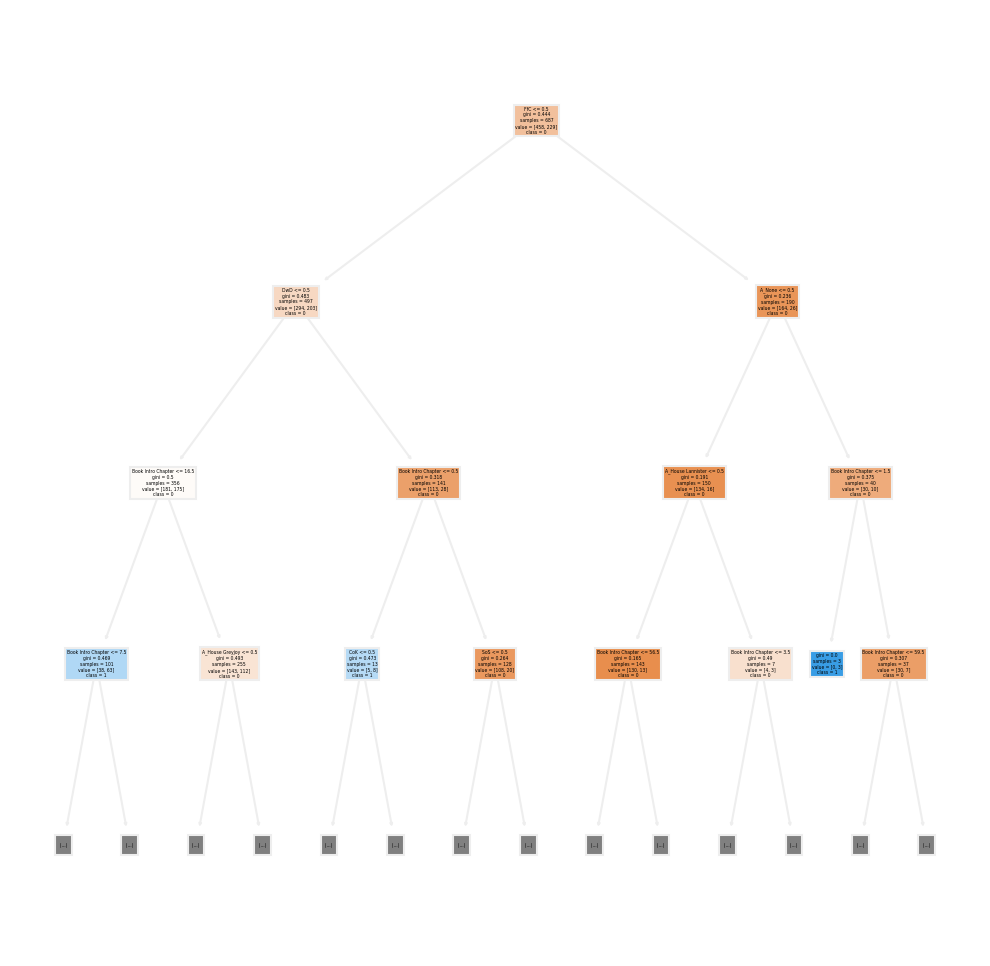

In [35]:
#show tree
fn = ['A_Arryn', 'A_Baratheon', 'A_Greyjoy', 'A_House Arryn',
       'A_House Baratheon', 'A_House Greyjoy', 'A_House Lannister',
       'A_House Martell', 'A_House Stark', 'A_House Targaryen',
       'A_House Tully', 'A_House Tyrell', 'A_Lannister', 'A_Martell',
       'A_None', 'A_Stark', 'A_Targaryen', 'A_Tully', 'A_Tyrell', 
       'A_Wildling', 'Book Intro Chapter', 'Gender',
       'Nobility', 'GoT', 'CoK', 'SoS', 'FfC', 'DwD']
cn = ['0', '1']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4,4), dpi=300)
tree.plot_tree(got_clf, max_depth=3
                      , feature_names = fn
                      , class_names=cn
                      , filled = True)
fig.savefig('got.jpg')

In [24]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score

In [32]:
y_true = test_y.values
y_pred = test_y_predicted

In [33]:
print('accuracy：{}'.format(accuracy_score(y_true, y_pred)))
print('precision：{}'.format(precision_score(y_true, y_pred, average=None)))
print('recall：{}'.format(recall_score(y_true, y_pred, average=None)))

accuracy：0.6304347826086957
precision：[0.72868217 0.4       ]
recall：[0.74015748 0.38596491]


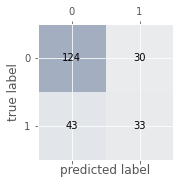

In [45]:
#show Confusion Matrix
from sklearn.metrics import confusion_matrix
confmat = confusion_matrix(y_true=y_true, y_pred=y_pred)
fig, ax = plt.subplots(figsize=(2.5, 2.5))
ax.matshow(confmat, cmap=plt.cm.Blues, alpha=0.3)
for i in range(confmat.shape[0]):
    for j in range(confmat.shape[1]):
        ax.text(x=j, y=i, s=confmat[i,j], va='center', ha='center')
plt.xlabel('predicted label')        
plt.ylabel('true label')
plt.show()

In [38]:
# creat decision tree model
from sklearn.ensemble import RandomForestClassifier
DTC = RandomForestClassifier( )
DTC.fit( train_X, train_y )

# impoetance rank 
col_names = train_X.columns
importances = DTC.feature_importances_
Feature_Rank = pd.DataFrame( { 'Feature_Name':col_names, 'Importance':importances } )
Feature_Rank.sort_values( by='Importance', ascending=False, inplace=True ) 
Feature_Rank

,Feature_Name,Importance
0,Book Intro Chapter,0.624008
6,FfC,0.087200
7,DwD,0.065584
5,SoS,0.052587
4,CoK,0.049095
2,Nobility,0.045307
3,GoT,0.038627
1,Gender,0.037592


In [46]:
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier
import numpy as np

In [51]:
knn = KNeighborsClassifier(n_neighbors=2)

In [52]:
scores = cross_val_score(knn,data_x ,data_y,cv=5,scoring='accuracy')
print(scores)
print(scores.mean())

[0.69021739 0.69565217 0.72677596 0.69398907 0.71038251]
0.7034034212401996


In [49]:
k_range = range(1,31)
k_scores = []
for k_number in k_range:
    knn = KNeighborsClassifier(n_neighbors=k_number)
    scores = cross_val_score(knn,data_x ,data_y,cv=10,scoring='accuracy')
    k_scores.append(scores.mean())

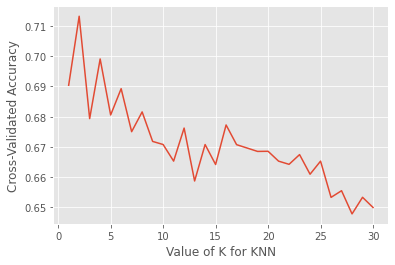

In [50]:
plt.plot(k_range,k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()